In [1]:
import numpy as np

In [2]:
from adjustText import adjust_text

In [3]:
import verdict

In [4]:
import cc.atlas as atlas

In [5]:
a = atlas.Atlas( '../cc/tests/data/example_atlas', bibtex_fp='../cc/tests/data/example_atlas/example.bib' )

#### Process the bibtex notes.

In [6]:
a.data.process_bibtex_annotations( word_per_concept=True )
a.data.identify_unique_key_concepts()

Dict, {
'VandeVoort2018a' : None,
'Stern2018' : None,
'Howk2017' : None,
'Garrison-kimmel2017' : None,
'Hopkins2017' : None,
'Hafen2016' : None,
'Muratov2016' : None,
'VandeVoort2016' : None,
'Hafen2019' : None,
'Hafen2019a' : None,
}

In [7]:
# Retrieve Atlas Data
for key, item in a.data.items():
    print( key )
    item.process_abstract()

VandeVoort2018a
Stern2018
Howk2017
Garrison-kimmel2017
Hopkins2017
Hafen2016
Muratov2016
VandeVoort2016
Hafen2019
Hafen2019a


In [8]:
a.save_data()

# Plot

In [9]:
import cProfile

         31693596 function calls (31692223 primitive calls) in 24.101 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000   24.101   24.101 {built-in method builtins.exec}
        1    0.000    0.000   24.101   24.101 <string>:1(<module>)
        1    0.000    0.000   24.101   24.101 atlas.py:342(plot_cospsi2d)
        2    0.000    0.000   24.075   12.037 atlas.py:305(cospsi_data)
  440/240    0.102    0.000   24.071    0.100 publication.py:370(inner_product)
    31778    1.356    0.000   23.960    0.001 utils.py:38(match_words)
       22    0.002    0.000   22.817    1.037 atlas.py:276(inner_product)
    18934    0.466    0.000   22.342    0.001 utils.py:129(stem)
   143634    0.179    0.000   16.625    0.000 __init__.py:115(word_tokenize)
   143634    0.180    0.000    9.284    0.000 __init__.py:131(<listcomp>)
   143634    1.168    0.000    9.104    0.000 treebank.py:110(tokenize)
  4309020    

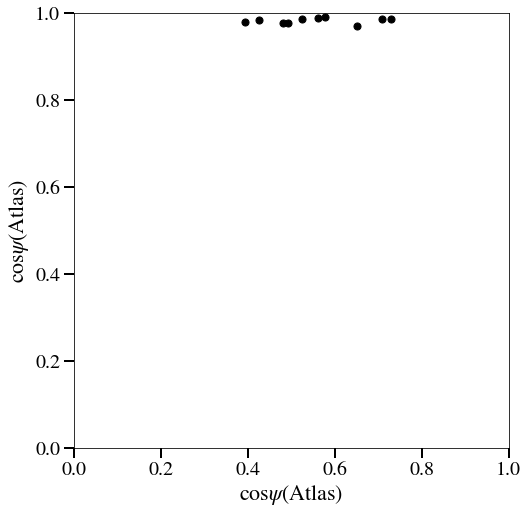

In [10]:
%matplotlib inline

profile_result = cProfile.run(
    '''cospsi_a, cospsi_a_abs = a.plot_cospsi2d(
        a,
        a,
        y_kwargs = { 'method': 'abstract similarity'},
    )''',
    sort = 'cumulative',
)

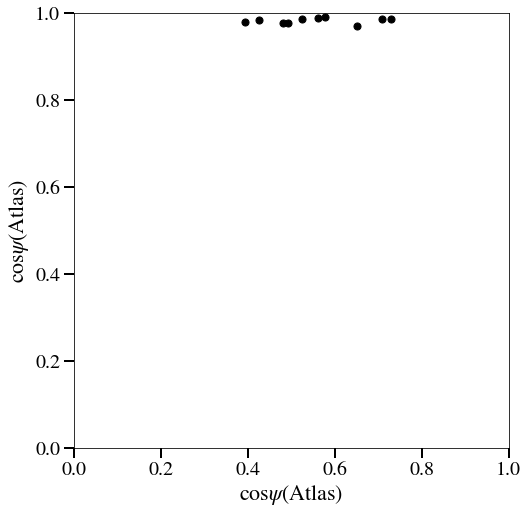

In [11]:
%matplotlib inline

cospsi_a, cospsi_a_abs = a.plot_cospsi2d(
    a,
    a,
    y_kwargs = { 'method': 'abstract similarity'},
)

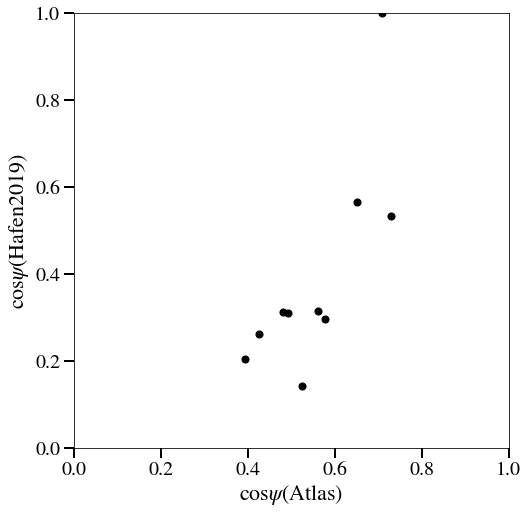

In [12]:
%matplotlib inline

cospsi_a, cospsi_h19 = a.plot_cospsi2d(
    a,
    a.data['Hafen2019'],
)

In [13]:
a.data['Hafen2019'].ads_query.response.get_ratelimits()

AttributeError: 'Publication' object has no attribute 'ads_query'